In [27]:
#Imports
import numpy as np 
import collections
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy import stats
import seaborn as sns

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.spatial.distance import pdist, squareform
from scipy.stats import variation
from scipy.cluster.hierarchy import cophenet

from sklearn.metrics import silhouette_score, davies_bouldin_score

from sklearn.decomposition import PCA

## Carga de datos

In [2]:
# Carga datos preprocesados

nhanesDF = pd.read_csv('/Users/raul/Documents/UOC/TFM/NHANEScluster/Data/Processed/nhanesDF.csv',
                           sep=',', index_col=[0])
nhanesDF.shape


(2350, 32)

## Selección de método de enlace

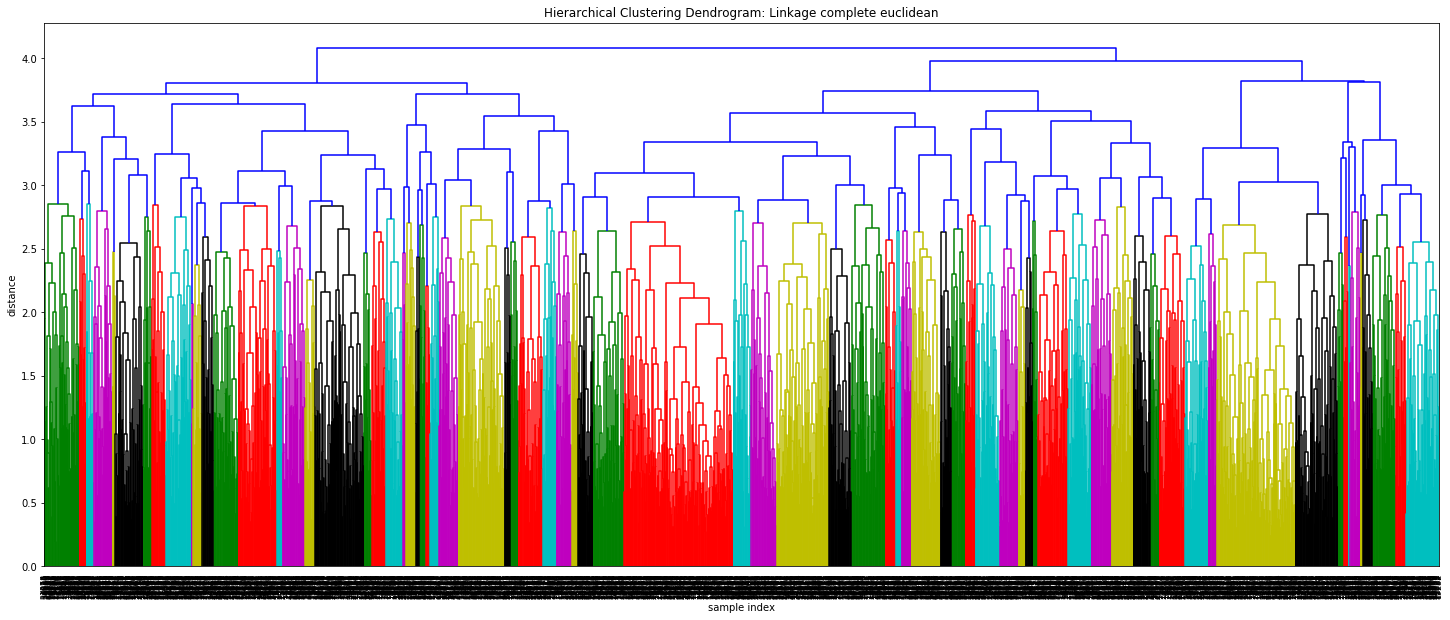

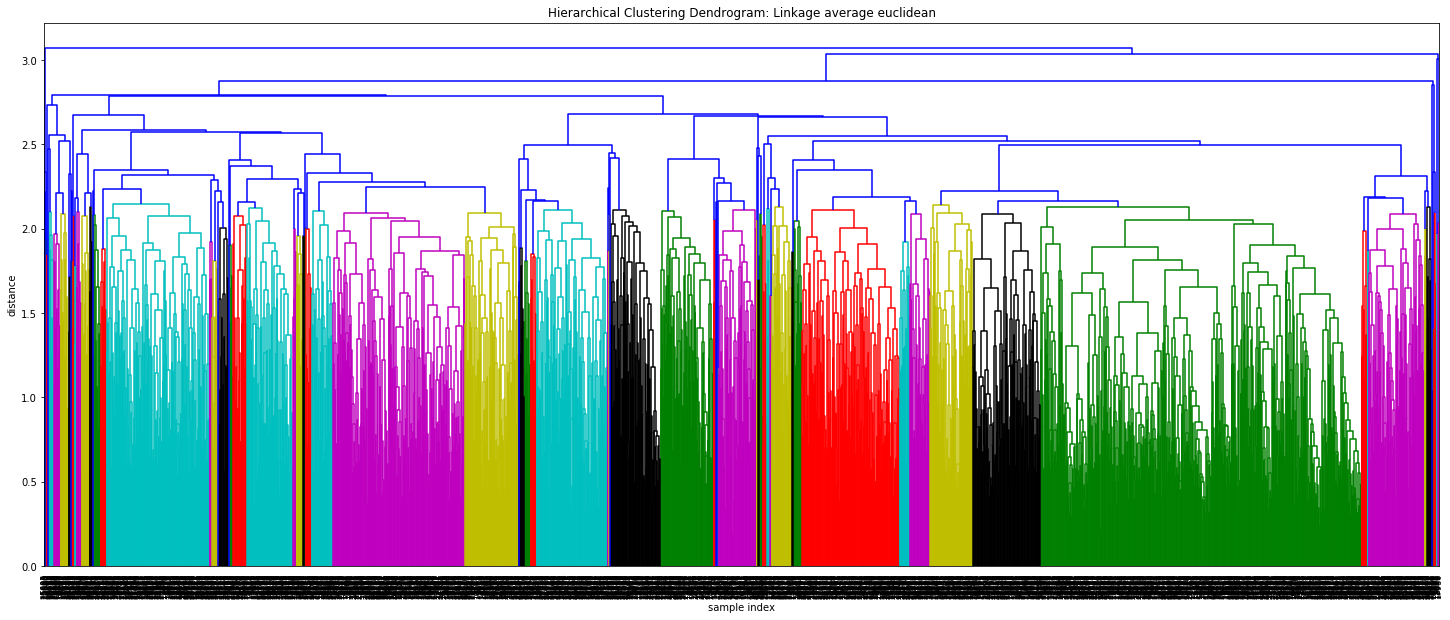

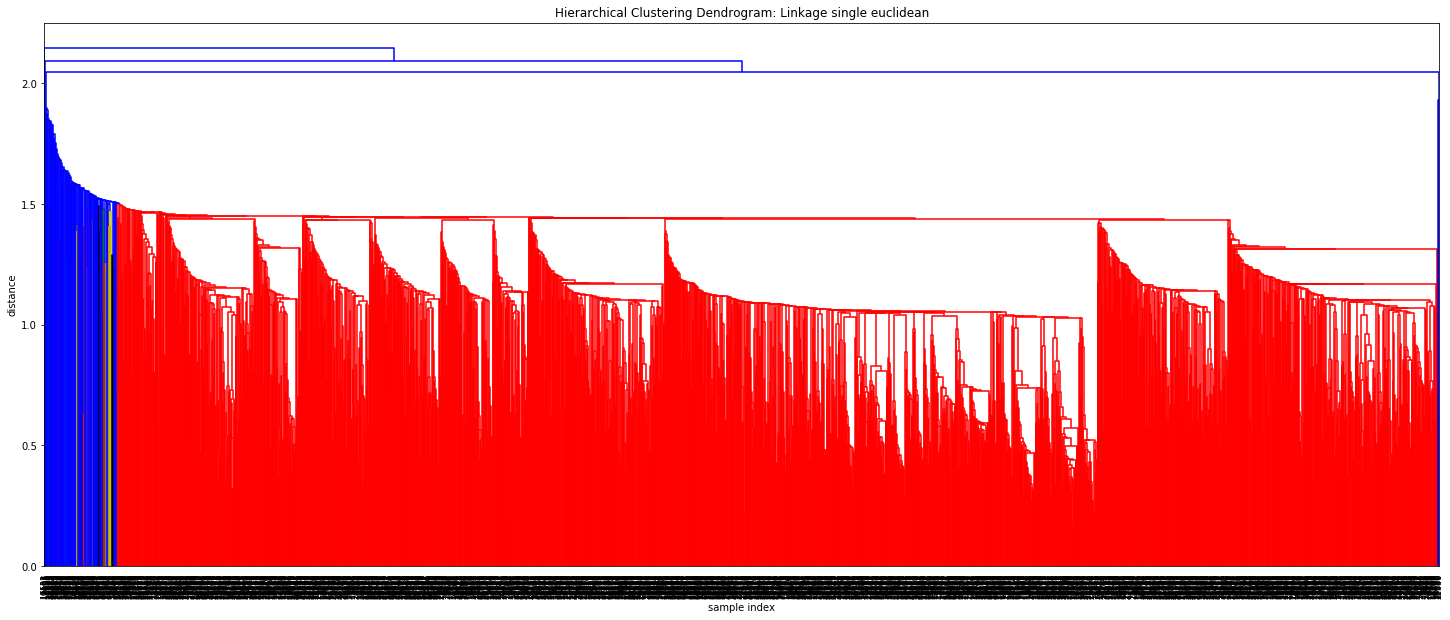

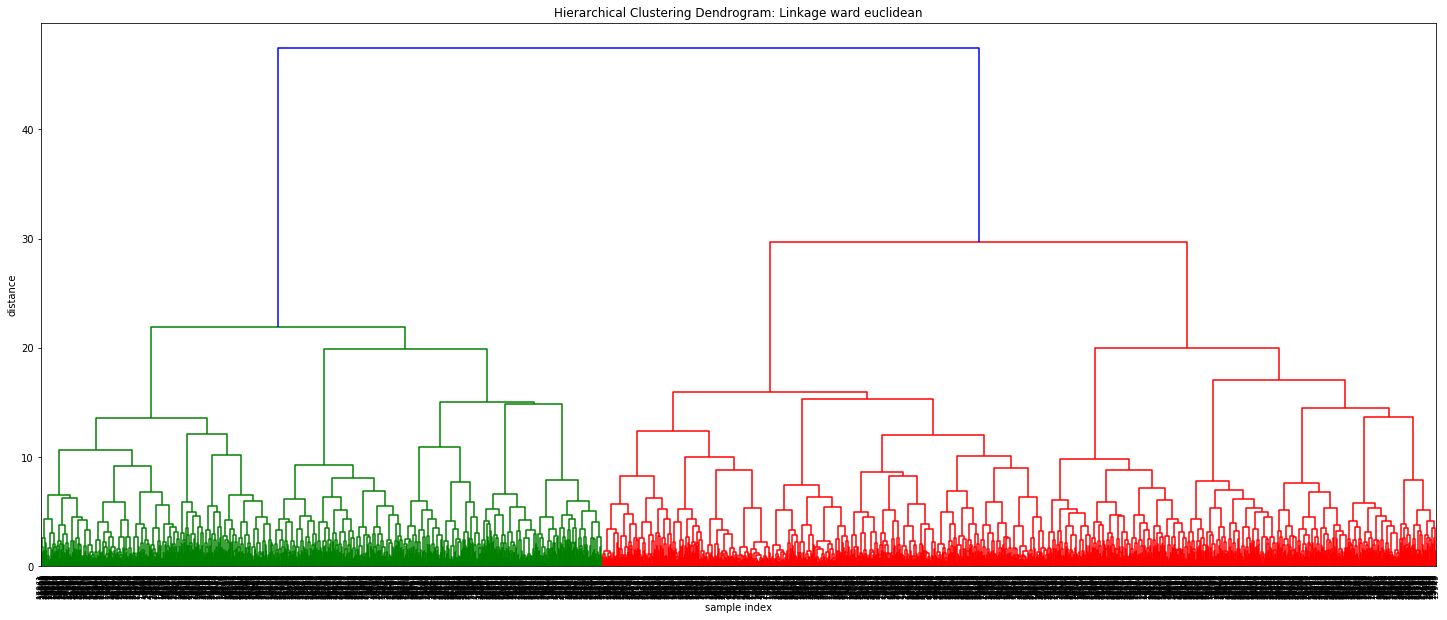

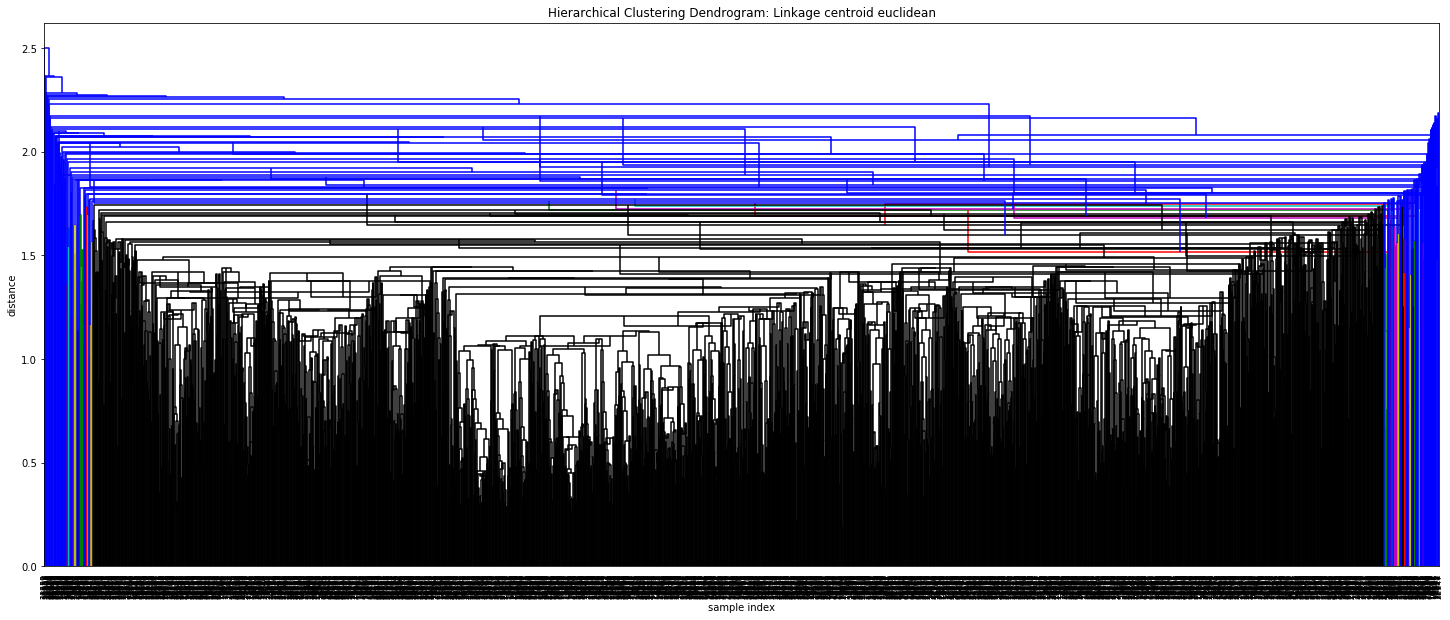

In [3]:
# Modelo Jerárquico

# Función que ejecuta algoritmo para cada método de enlace y dibuja 
# dendrograma y clusterización.

linkage_m = ['complete', 'average', 'single', 'ward', 'centroid'] 
distance_m = ['euclidean']


def aglomerative_clust (X, metodos, metricas):
    for m in metodos:
        for d in metricas:
            Z = linkage(X, m, d)
            
            plt.figure(figsize=(25, 10))
            plt.title('Hierarchical Clustering Dendrogram: Linkage {} {}'.format(m, d))
            plt.xlabel('sample index')
            plt.ylabel('distance')
            dendrogram(Z, labels=X.index, leaf_rotation=90., leaf_font_size=8.)
            plt.show()
        
# Aplicación clusters jerárquicos
aglomerative_clust(nhanesDF.loc[:, 'BMXBMI':'RIDRETH3_7'], linkage_m, distance_m)



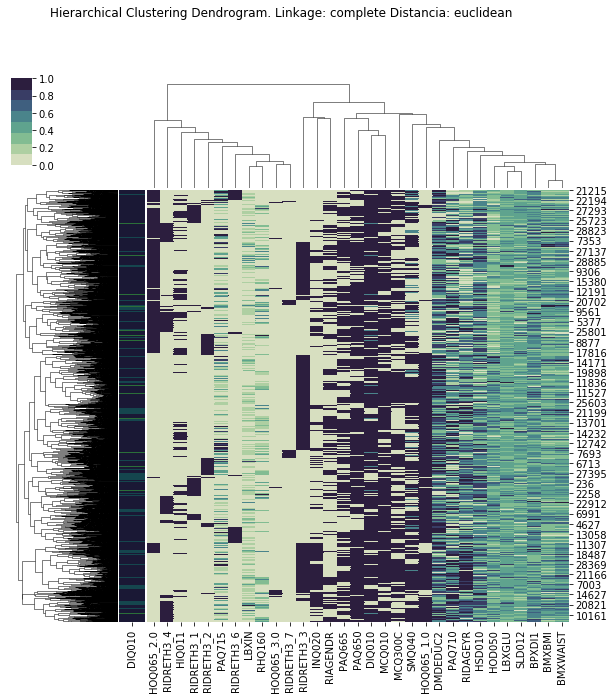

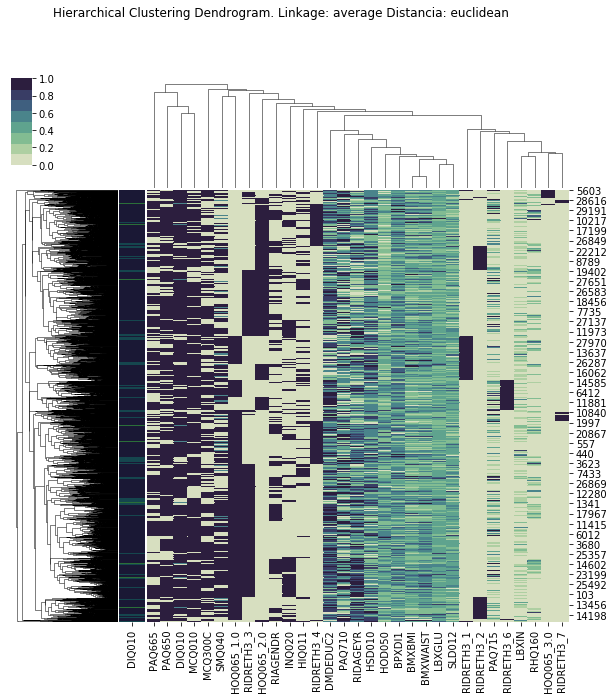

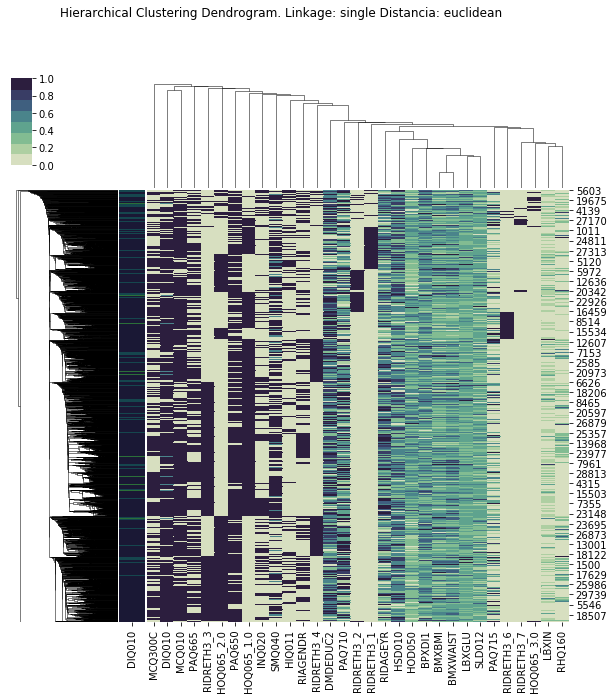

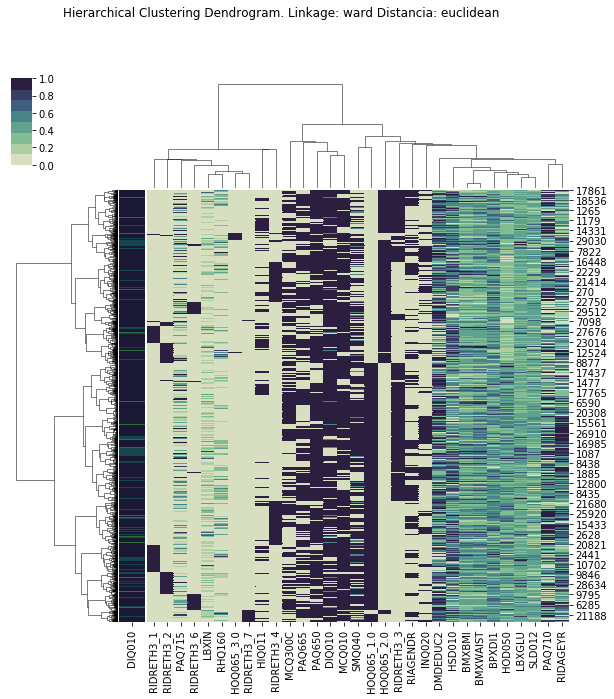

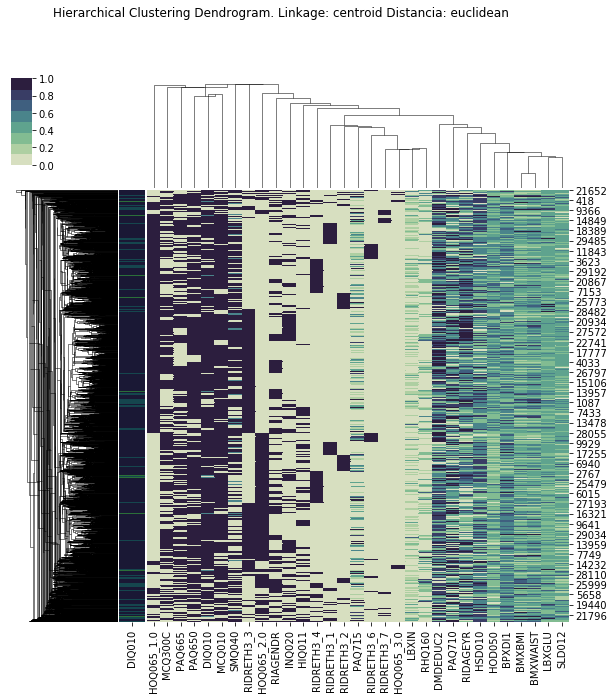

In [4]:
# Función que ejecuta algoritmo para cada método de enlace y dibuja 
# dendrograma y clusterización.

# Prepare a vector of color mapped to the 'DIQ010' column
my_palette = dict(zip(nhanesDF.loc[:, 'BMXBMI':'RIDRETH3_7'].DIQ010.unique(), sns.color_palette("cubehelix", 8)))
row_colors = nhanesDF.loc[:, 'BMXBMI':'RIDRETH3_7'].DIQ010.map(my_palette)

def aglomerative_clust (X, metodos, distancias):
    for m in metodos:
        for d in distancias:
            sns.clustermap(X, metric= d, method= m, cmap=sns.cubehelix_palette(8, start=.5, rot=-.75), 
                           row_colors=row_colors).fig.suptitle('Hierarchical Clustering Dendrogram. Linkage: {} Distancia: {}'.format(m, d))  
        
# Aplicación clusters jerárquicos
aglomerative_clust(nhanesDF.loc[:, 'BMXBMI':'RIDRETH3_7'], linkage_m, distance_m )

In [5]:
# Evaluación índice shiloutte para los doferentes métodos
def shil_coeff (X, metodos):
    for m in metodos:
        for i in range(2, 15):
            Z = linkage(X, m, 'euclidean')
            nodes = fcluster(Z, i, criterion="maxclust")
            print ('Método: {} n_clust: {} Coeff: {}'.format(m, i, silhouette_score(X , nodes, metric='euclidean')))
            
shil_coeff (nhanesDF.loc[:, 'BMXBMI':'RIDRETH3_7'], linkage_m)

Método: complete n_clust: 2 Coeff: 0.1343235429077334
Método: complete n_clust: 3 Coeff: 0.0689110376738252
Método: complete n_clust: 4 Coeff: 0.05191873379701576
Método: complete n_clust: 5 Coeff: 0.04961144548575871
Método: complete n_clust: 6 Coeff: 0.03809364421502821
Método: complete n_clust: 7 Coeff: 0.048296737696844
Método: complete n_clust: 8 Coeff: 0.04664634281119532
Método: complete n_clust: 9 Coeff: 0.05516713986340777
Método: complete n_clust: 10 Coeff: 0.059573736528153814
Método: complete n_clust: 11 Coeff: 0.05963905933275132
Método: complete n_clust: 12 Coeff: 0.06394119504124067
Método: complete n_clust: 13 Coeff: 0.07427312312312524
Método: complete n_clust: 14 Coeff: 0.07788273753042871
Método: average n_clust: 2 Coeff: 0.1458777296940728
Método: average n_clust: 3 Coeff: 0.10785356088479102
Método: average n_clust: 4 Coeff: 0.07487117436679745
Método: average n_clust: 5 Coeff: 0.0379948935257792
Método: average n_clust: 6 Coeff: 0.013448204021562075
Método: averag

In [6]:
# Cophenet indexes by method
def cophe_coef (X, metodos):
    for m in metodos:
        Z = linkage(X, m, 'euclidean')
        coef = cophenet(Z, pdist(X))
        print('Método: {} Coef: {}'.format(m, coef[0]))
        #ax = sns.heatmap(squareform(coef[1]))
        
cophe_coef (nhanesDF.loc[:, 'BMXBMI':'RIDRETH3_7'], linkage_m)

Método: complete Coef: 0.5276550601287322
Método: average Coef: 0.6252964797297416
Método: single Coef: 0.5625850793116266
Método: ward Coef: 0.5464697076274158
Método: centroid Coef: 0.46797601827841495


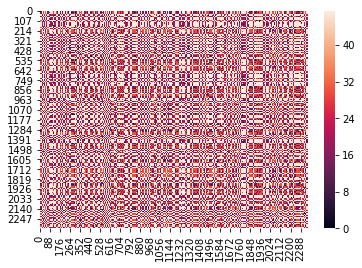

In [8]:
# Ward cophenet index
Z = linkage(nhanesDF.loc[:, 'BMXBMI':'RIDRETH3_7'], 'ward', 'euclidean')
coph = cophenet(Z, pdist(nhanesDF.loc[:, 'BMXBMI':'RIDRETH3_7']))
sns.heatmap(squareform(coph[1]))

## Clustering jerárquico. Método: Ward. Dístancia: Euclídea

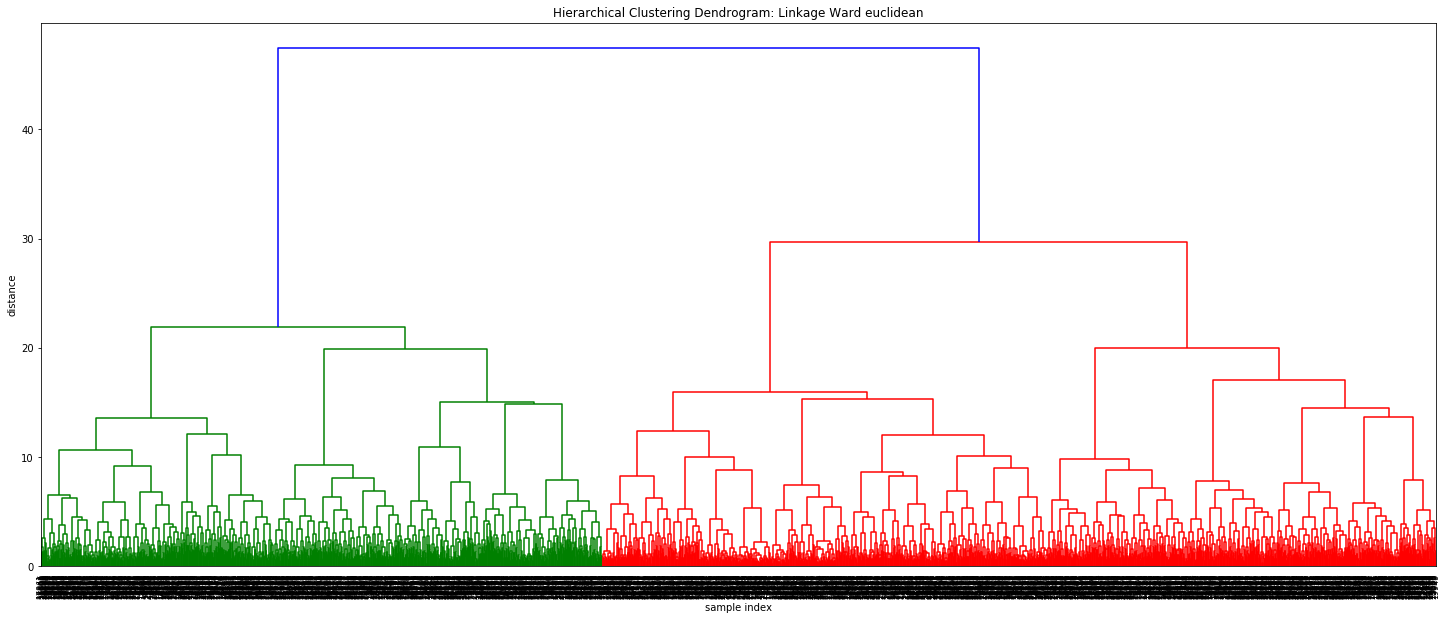

Counter({1: 946, 2: 1404})

In [10]:
# Elección Ward euclidean
X= nhanesDF.loc[:, 'BMXBMI':'RIDRETH3_7']

Z = linkage(X, 'ward', 'euclidean')
            
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram: Linkage {} {}'.format('Ward', 'euclidean'))
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(Z, labels=X.index, leaf_rotation=90., leaf_font_size=8.)
plt.show()

clusters = fcluster(Z, 2, criterion='maxclust')
collections.Counter(clusters)

## Análisis de clústeres

In [13]:
# Carga datos preprocesados sin estandarizar

nhanesDFClean = pd.read_csv('/Users/raul/Documents/UOC/TFM/NHANEScluster/Data/Processed/nhanesClean.csv',
                           sep=',', index_col=[0])
nhanesDFClean.shape

(2350, 25)

In [14]:
# Análisis de clusters

c1 = nhanesDFClean.iloc[np.where(clusters == 1)]
pd.set_option('display.max_columns', None)
c1.describe()

,SEQN,BMXBMI,BMXWAIST,BPXDI1,DIQ010,LBXGLU,LBXIN,HIQ011,HOD050,HOQ065,HSD010,INQ020,MCQ010,MCQ300C,PAQ650,PAQ665,PAQ710,PAQ715,RHQ160,SLD012,SMQ040,RIAGENDR,RIDAGEYR,RIDRETH3,DMDEDUC2
count,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000
mean,78050.021142,28.597780,99.238795,70.454545,1.931290,104.310782,12.020359,1.324524,4.517970,2.049683,3.024313,1.289641,1.809725,1.585624,1.799154,1.621564,2.655391,1.213531,1.289641,7.066056,1.987315,1.348837,46.278013,3.191332,3.160677
std,9234.771020,6.124573,15.374896,11.738263,0.338896,21.125191,9.601027,0.468445,1.604291,0.222218,0.954211,0.453835,0.392726,0.492875,0.400845,0.485254,1.624924,1.534046,2.180879,1.666768,0.942724,0.476854,16.415372,1.299723,1.182580
min,62172.000000,16.400000,65.800000,32.000000,1.000000,39.000000,0.140000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000,20.000000,1.000000,1.000000
25%,69338.750000,24.300000,88.725000,62.000000,2.000000,93.000000,5.815000,1.000000,3.000000,2.000000,2.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000,0.000000,6.000000,1.000000,1.000000,32.000000,3.000000,2.000000
50%,78468.000000,27.700000,98.300000,70.000000,2.000000,100.000000,8.860000,1.000000,4.000000,2.000000,3.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.500000,0.000000,7.000000,2.000000,1.000000,45.000000,3.000000,3.000000
75%,86019.000000,31.900000,108.225000,78.000000,2.000000,109.000000,15.085000,2.000000,5.000000,2.000000,4.000000,2.000000,2.000000,2.000000,2.000000,2.000000,4.000000,2.000000,2.000000,8.000000,3.000000,2.000000,58.000000,4.000000,4.000000
max,93695.000000,48.400000,151.000000,108.000000,3.000000,222.000000,61.930000,2.000000,13.000000,3.000000,5.000000,2.000000,2.000000,2.000000,2.000000,2.000000,5.000000,5.000000,11.000000,13.000000,3.000000,2.000000,80.000000,7.000000,5.000000


In [15]:
c2 = nhanesDFClean.iloc[np.where(clusters == 2)]
pd.set_option('display.max_columns', None)
c2.describe()

,SEQN,BMXBMI,BMXWAIST,BPXDI1,DIQ010,LBXGLU,LBXIN,HIQ011,HOD050,HOQ065,HSD010,INQ020,MCQ010,MCQ300C,PAQ650,PAQ665,PAQ710,PAQ715,RHQ160,SLD012,SMQ040,RIAGENDR,RIDAGEYR,RIDRETH3,DMDEDUC2
count,1404.000000,1404.000000,1404.000000,1404.000000,1404.000000,1404.000000,1404.000000,1404.000000,1404.000000,1404.000000,1404.000000,1404.000000,1404.000000,1404.000000,1404.000000,1404.000000,1404.000000,1404.000000,1404.000000,1404.000000,1404.000000,1404.000000,1404.000000,1404.000000,1404.000000
mean,78662.042023,28.637536,101.025570,69.331909,1.878205,108.629630,12.589195,1.160969,6.449832,1.016382,2.881766,1.285613,1.844729,1.561254,1.822650,1.577635,2.750712,1.101852,1.190171,7.091591,2.325499,1.355413,56.325499,3.253561,3.405271
std,9047.940565,5.759339,14.900393,11.723147,0.403277,23.277425,10.529387,0.367633,1.836483,0.132478,0.927282,0.451867,0.362292,0.496411,0.382101,0.494112,1.532901,1.314141,1.947681,1.490966,0.907813,0.478809,15.642802,1.407579,1.188685
min,62218.000000,13.400000,56.200000,32.000000,1.000000,21.000000,0.140000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000,20.000000,1.000000,1.000000
25%,70329.000000,24.400000,91.000000,62.000000,2.000000,95.000000,6.077500,1.000000,5.000000,1.000000,2.000000,1.000000,2.000000,1.000000,2.000000,1.000000,2.000000,0.000000,0.000000,6.000000,1.000000,1.000000,45.000000,3.000000,3.000000
50%,79476.500000,27.900000,100.300000,70.000000,2.000000,103.000000,9.755000,1.000000,6.000000,1.000000,3.000000,1.000000,2.000000,2.000000,2.000000,2.000000,3.000000,0.500000,0.000000,7.000000,3.000000,1.000000,59.000000,3.000000,4.000000
75%,86171.750000,31.800000,109.925000,76.000000,2.000000,114.000000,15.390000,1.000000,8.000000,1.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,4.000000,2.000000,2.000000,8.000000,3.000000,2.000000,68.000000,4.000000,4.000000
max,93655.000000,48.800000,150.600000,106.000000,3.000000,222.000000,83.340000,2.000000,13.000000,3.000000,5.000000,2.000000,2.000000,2.000000,2.000000,2.000000,5.000000,5.000000,12.000000,14.500000,3.000000,2.000000,80.000000,7.000000,5.000000


In [41]:
# Preparación datos para clasificador
# Etiquetado de observaciones

clus1 = c1
clus2 = c2

clus1['CLUSTER'] = 1
clus2['CLUSTER'] = 2

labeledDF = pd.concat([clus1, clus2],axis=0)
labeledDF.shape


/Users/raul/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/Users/raul/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


(2350, 26)

In [42]:
# NHANES exportar datos etiquetados

labeledDF.to_csv('/Users/raul/Documents/UOC/TFM/NHANEScluster/Data/Processed/nhanesLabeled.csv', sep=',',
                   encoding='utf-8') 

In [16]:
# Análisis de coeficientes de variación  
print ("\nVariation at axis = 1: \n", variation(c1, axis = 0)) 


Variation at axis = 1: 
 [0.11825607 0.21404932 0.15484638 0.16651952 0.17538384 0.20241457
 0.79830817 0.35348301 0.35490343 0.10835849 0.31534664 0.35172245
 0.21689367 0.31067525 0.22267843 0.29909201 0.61161048 1.26345002
 1.69018063 0.23575902 0.47411971 0.35334313 0.35452458 0.40705124
 0.37395612]


In [17]:
print ("\nVariation at axis = 1: \n", variation(c2, axis = 0)) 


Variation at axis = 1: 
 [0.11498199 0.20103991 0.14743877 0.16902709 0.21463751 0.21420614
 0.83608497 0.31654777 0.28463207 0.13029627 0.32166108 0.35135444
 0.19632284 0.31784319 0.20956579 0.31308628 0.55707574 1.19224124
 1.63588848 0.21016931 0.39023454 0.35313094 0.27762258 0.43247294
 0.34894788]


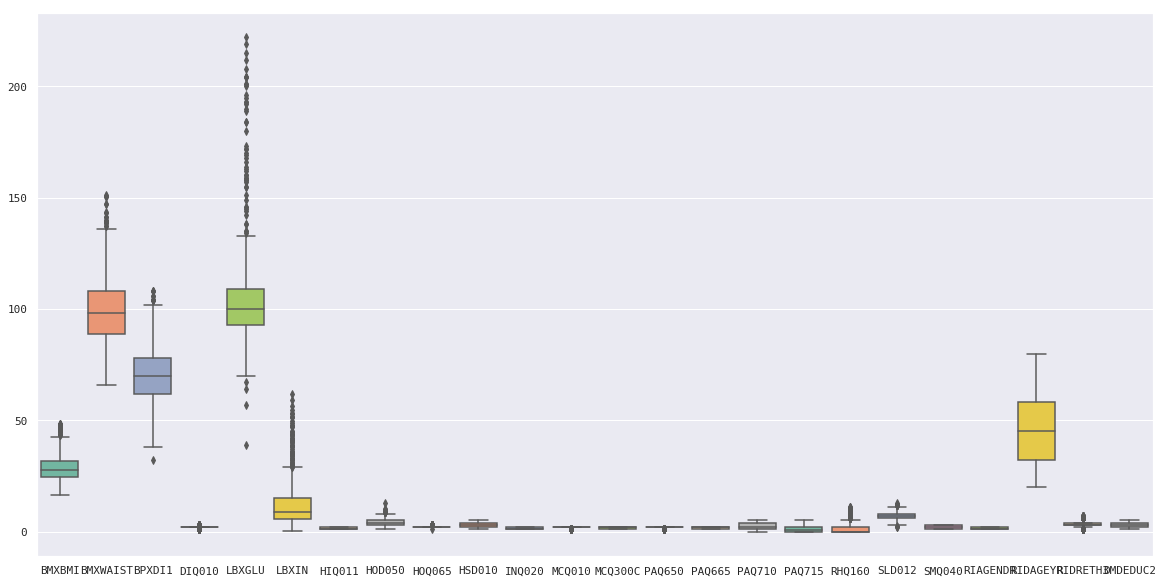

In [285]:
# Boxplot variables cluster 1
plt.figure(figsize=(20,10))
ax = sns.boxplot(data=c1.loc[:, 'BMXBMI':'DMDEDUC2'], orient="v", palette="Set2")

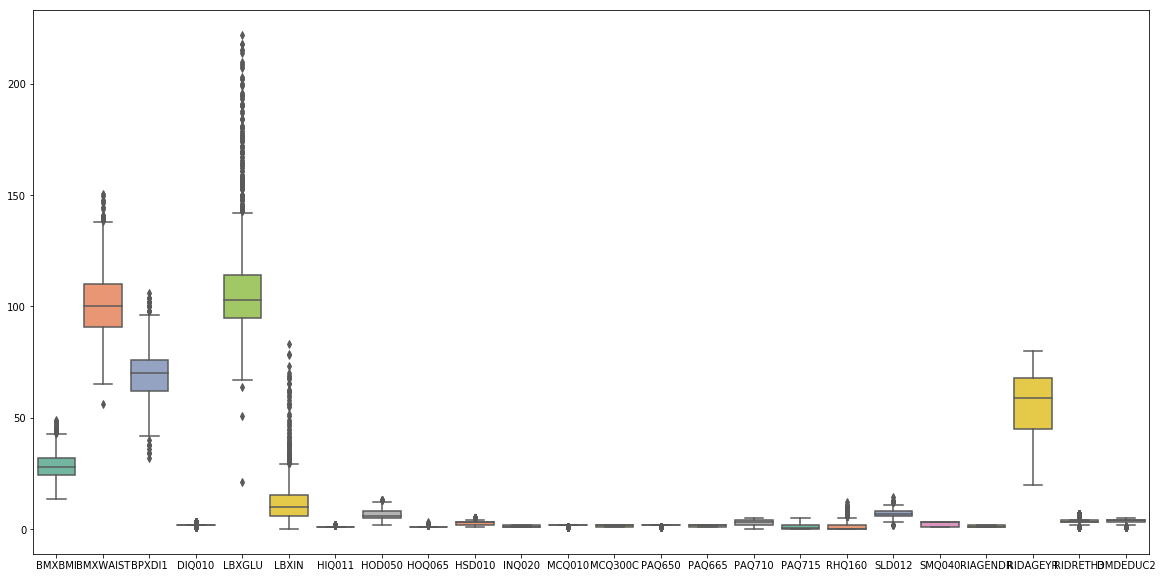

In [19]:
# Boxplot variables cluster 2
plt.figure(figsize=(20,10))
ax = sns.boxplot(data=c2.loc[:, 'BMXBMI':'DMDEDUC2'], orient="v", palette="Set2")

In [ ]:
var_list = ['BMXBMI', 'BMXWAIST', 'BPXDI1', 'DIQ010', 'LBXGLU', 'LBXIN', 'HIQ011', 'HOD050', 'HOQ065', 'HSD010',
           'INQ020', 'MCQ010', 'MCQ300C', 'PAQ650', 'PAQ665', 'PAQ710', 'PAQ715', 'RHQ160', 'SLD012', 'SMQ040',
           'RIAGENDR', 'RIDAGEYR', 'RIDRETH3', 'DMDEDUC2']

In [ ]:
for col in var_list:
    
    plt.figure(figsize=(20,10))
    ax = sns.boxplot(data=c2.loc[:, 'BMXBMI':'DMDEDUC2'], orient="v", palette="Set2")
    
sns.boxplot(x="variable", y="value", data=pd.melt(df))

Text(0.5, 0, 'Cluster 2')

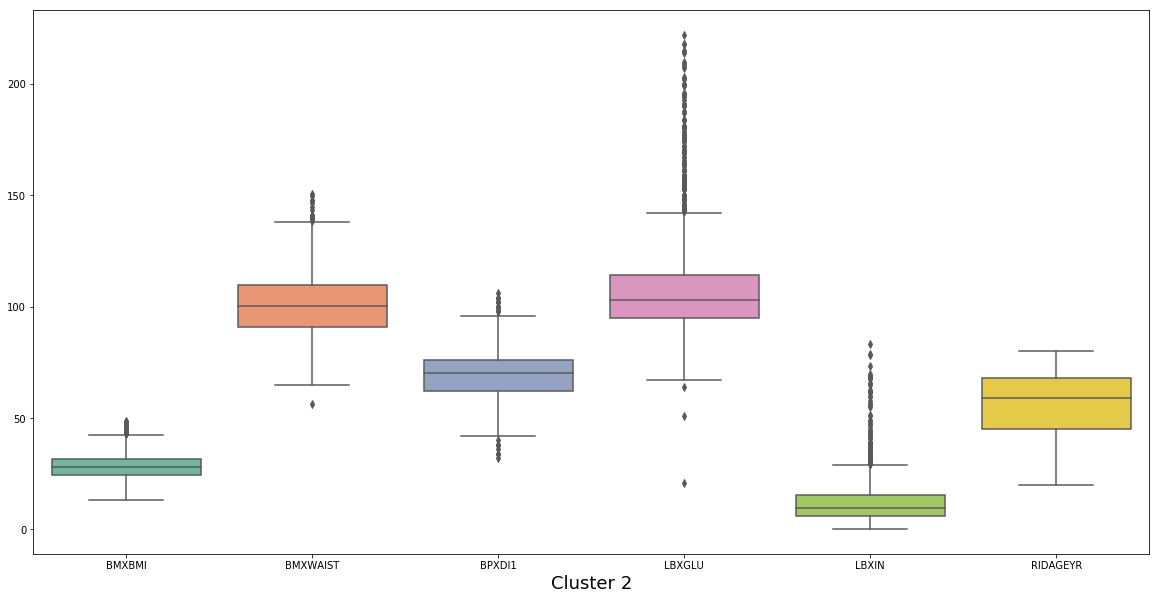

In [20]:
    # Boxplot variables cluster 2
    plt.figure(figsize=(20,10))
    ax = sns.boxplot(data=c2.loc[:, ('BMXBMI', 'BMXWAIST', 'BPXDI1', 'LBXGLU', 'LBXIN',
                                     'RIDAGEYR')], orient="v", palette="Set2")
    plt.xlabel("Cluster 2",fontsize=18)

Text(0.5, 0, 'Cluster 1')

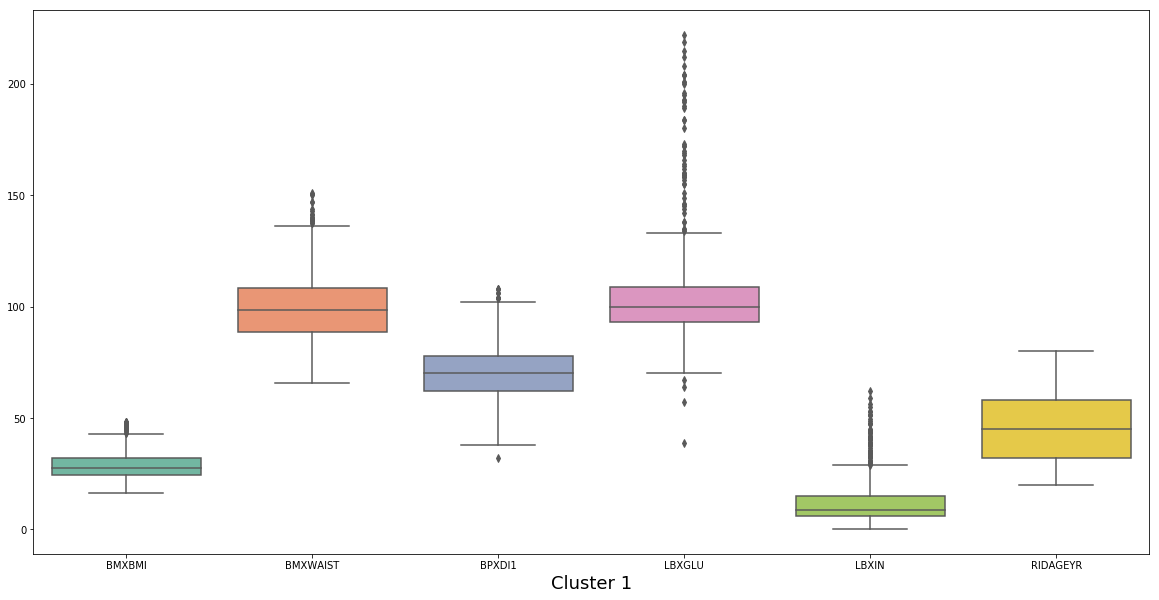

In [21]:
# Boxplot variables cluster 1
plt.figure(figsize=(20,10))
ax = sns.boxplot(data=c1.loc[:, ('BMXBMI', 'BMXWAIST', 'BPXDI1', 'LBXGLU', 'LBXIN', 'RIDAGEYR')], 
                 orient="v", palette="Set2")
plt.xlabel("Cluster 1", fontsize=18)

Text(0.5, 0, 'Cluster 1')

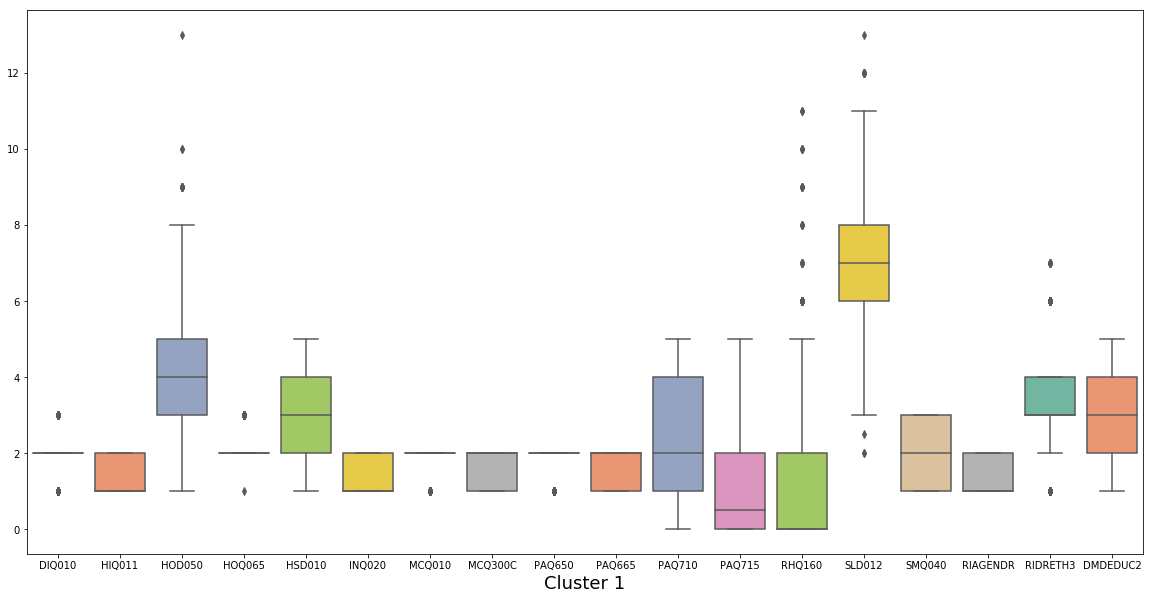

In [22]:
plt.figure(figsize=(20,10))
ax = sns.boxplot(data=c1.loc[:, ('DIQ010', 'HIQ011', 'HOD050', 'HOQ065', 'HSD010',
           'INQ020', 'MCQ010', 'MCQ300C', 'PAQ650', 'PAQ665', 'PAQ710', 'PAQ715', 'RHQ160', 'SLD012', 'SMQ040',
           'RIAGENDR', 'RIDRETH3', 'DMDEDUC2')], 
                 orient="v", palette="Set2")
plt.xlabel("Cluster 1", fontsize=18)

Text(0.5, 0, 'Cluster 2')

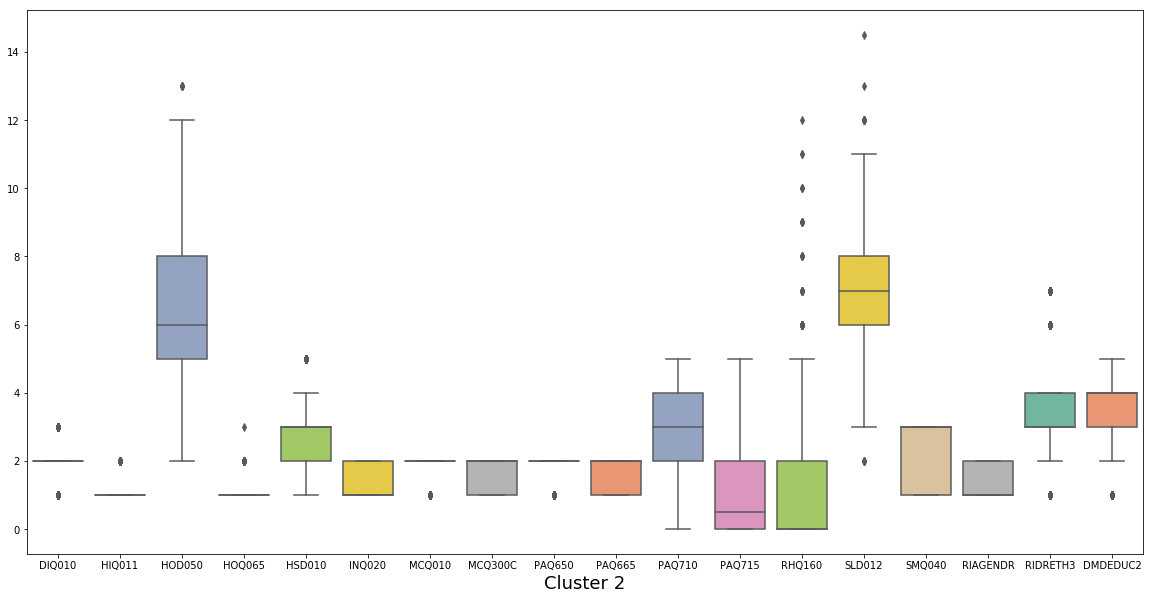

In [23]:
plt.figure(figsize=(20,10))
ax = sns.boxplot(data=c2.loc[:, ('DIQ010', 'HIQ011', 'HOD050', 'HOQ065', 'HSD010',
           'INQ020', 'MCQ010', 'MCQ300C', 'PAQ650', 'PAQ665', 'PAQ710', 'PAQ715', 'RHQ160', 'SLD012', 'SMQ040',
           'RIAGENDR', 'RIDRETH3', 'DMDEDUC2')], 
                 orient="v", palette="Set2")
plt.xlabel("Cluster 2", fontsize=18)

In [ ]:
# Análisis de ocurrencias por cluster para comparación

In [18]:
c1['RIAGENDR'].value_counts()

1    616
2    330
Name: RIAGENDR, dtype: int64

In [19]:
c2['RIAGENDR'].value_counts()

1    905
2    499
Name: RIAGENDR, dtype: int64

In [423]:
c2['HOQ065'].value_counts()

1.0    1382
2.0      21
3.0       1
Name: HOQ065, dtype: int64

In [422]:
c1['HOQ065'].value_counts()

2.0    897
3.0     48
1.0      1
Name: HOQ065, dtype: int64

In [36]:
# Corte dendrograma para 3 clusters

clusters3 = fcluster(Z, 3, criterion='maxclust')
collections.Counter(clusters3)


Counter({1: 946, 3: 653, 2: 751})

## Análisis aglomeración jerárquica con 3 clusters

In [37]:
# HAC 3 clusters

cl1 = nhanesDFClean.iloc[np.where(clusters3 == 1)]
cl2 = nhanesDFClean.iloc[np.where(clusters3 == 2)]
cl3 = nhanesDFClean.iloc[np.where(clusters3 == 3)]
print ("\nVariation at Cluster 1: \n", variation(cl1, axis = 0)) 
print ("\nVariation at Cluster 2: \n", variation(cl2, axis = 0)) 
print ("\nVariation at Cluster 3: \n", variation(cl3, axis = 0)) 


Variation at Cluster 1: 
 [0.11825607 0.21404932 0.15484638 0.16651952 0.17538384 0.20241457
 0.79830817 0.35348301 0.35490343 0.10835849 0.31534664 0.35172245
 0.21689367 0.31067525 0.22267843 0.29909201 0.61161048 1.26345002
 1.69018063 0.23575902 0.47411971 0.35334313 0.35452458 0.40705124
 0.37395612]

Variation at Cluster 2: 
 [0.11463022 0.1999772  0.14982794 0.16831366 0.1947418  0.20831067
 0.77365097 0.30425459 0.28038464 0.         0.32199258 0.35346152
 0.21622899 0.30256062 0.20073641 0.31180933 0.53452502 1.09545562
 1.49887323 0.19846385 0.3744579  0.35038449 0.28223608 0.13812277
 0.32034021]

Variation at Cluster 3: 
 [0.11510479 0.2022032  0.14397918 0.16812607 0.23534654 0.22026849
 0.89026552 0.32779894 0.28608825 0.18592032 0.31630847 0.33926577
 0.17025097 0.33247498 0.21922038 0.3145339  0.58239443 1.31828837
 1.79729772 0.22202736 0.40705352 0.35301881 0.26986781 0.56801469
 0.37875162]


Text(0.5, 0, 'Cluster 1')

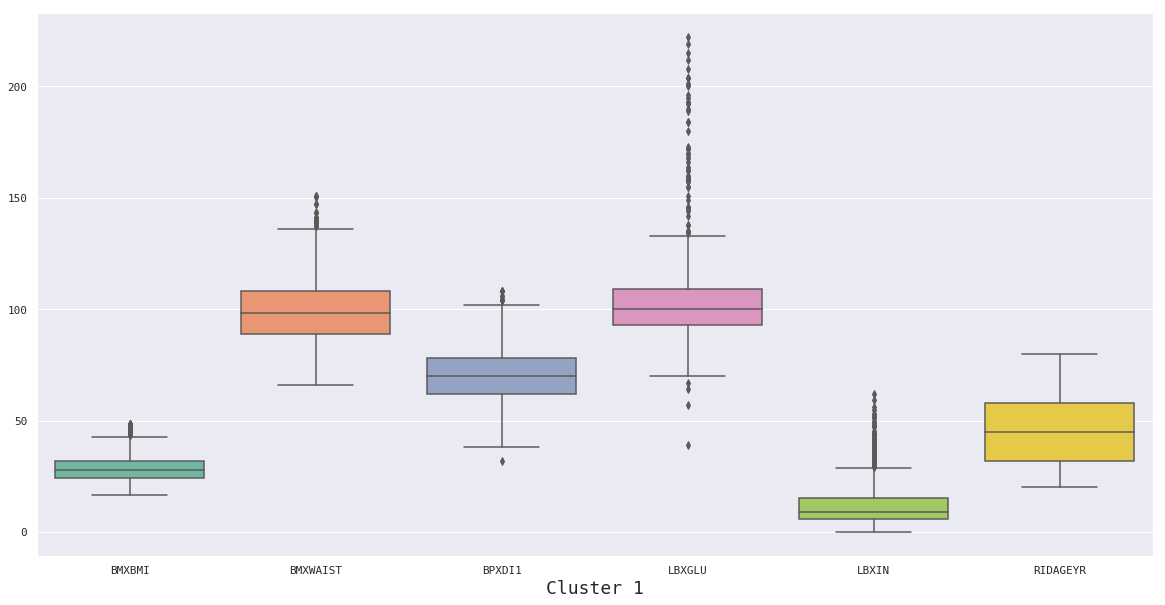

In [424]:
    plt.figure(figsize=(20,10))
    ax = sns.boxplot(data=cl1.loc[:, ('BMXBMI', 'BMXWAIST', 'BPXDI1', 'LBXGLU', 'LBXIN',
                                     'RIDAGEYR')], orient="v", palette="Set2")
    plt.xlabel("Cluster 1",fontsize=18)

Text(0.5, 0, 'Cluster 2')

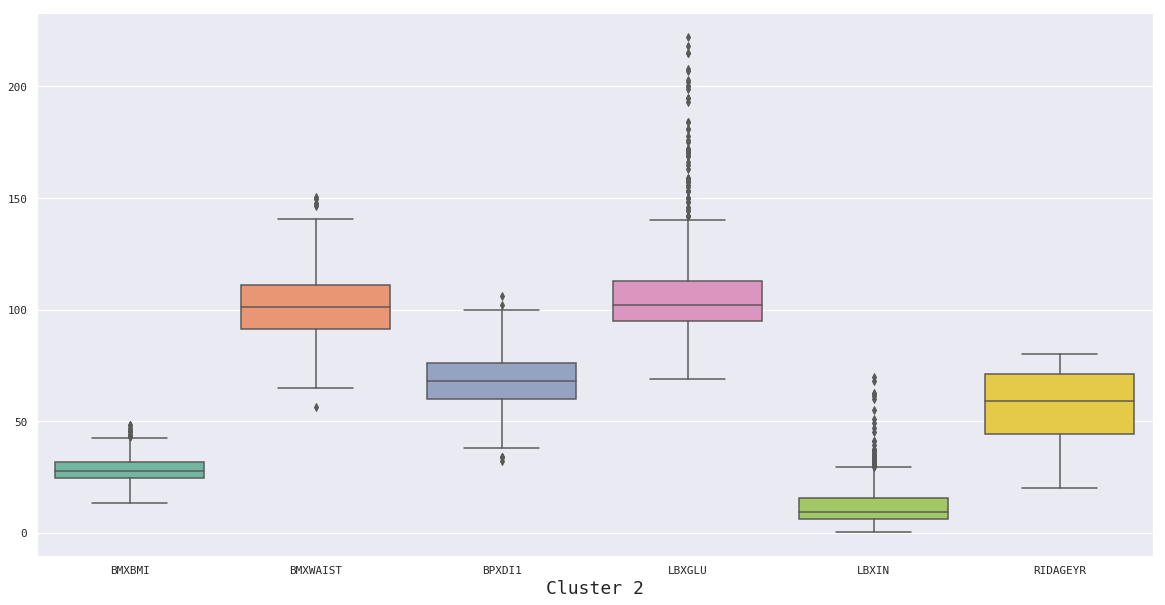

In [345]:
    plt.figure(figsize=(20,10))
    ax = sns.boxplot(data=cl2.loc[:, ('BMXBMI', 'BMXWAIST', 'BPXDI1', 'LBXGLU', 'LBXIN',
                                     'RIDAGEYR')], orient="v", palette="Set2")
    plt.xlabel("Cluster 2",fontsize=18)

Text(0.5, 0, 'Cluster 3')

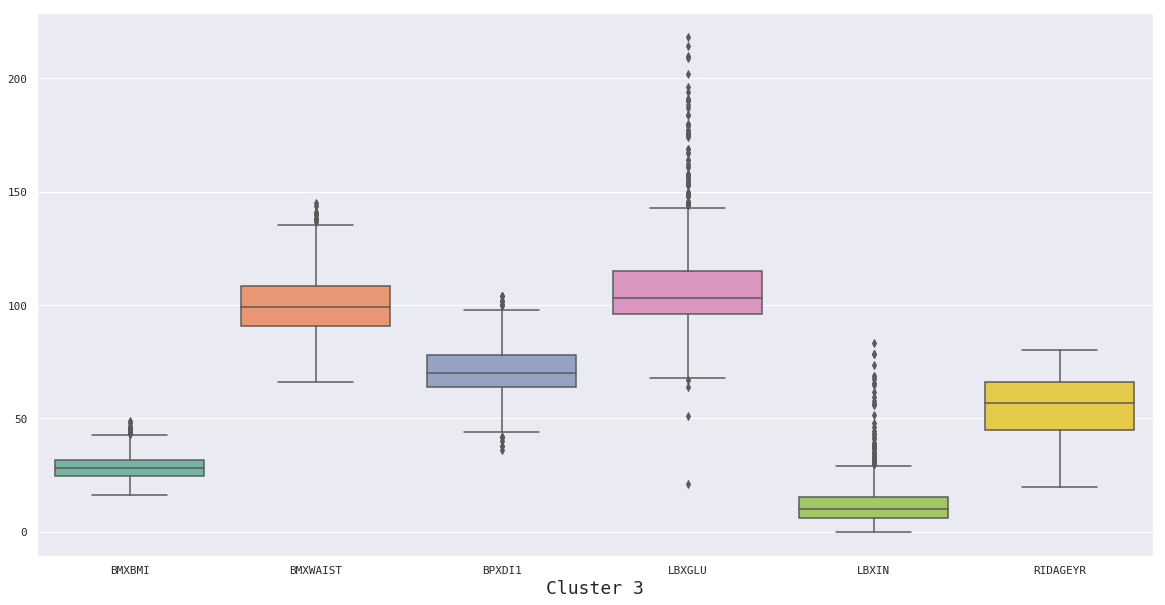

In [425]:
    plt.figure(figsize=(20,10))
    ax = sns.boxplot(data=cl3.loc[:, ('BMXBMI', 'BMXWAIST', 'BPXDI1', 'LBXGLU', 'LBXIN',
                                     'RIDAGEYR')], orient="v", palette="Set2")
    plt.xlabel("Cluster 3",fontsize=18)

Text(0.5, 0, 'Cluster 1')

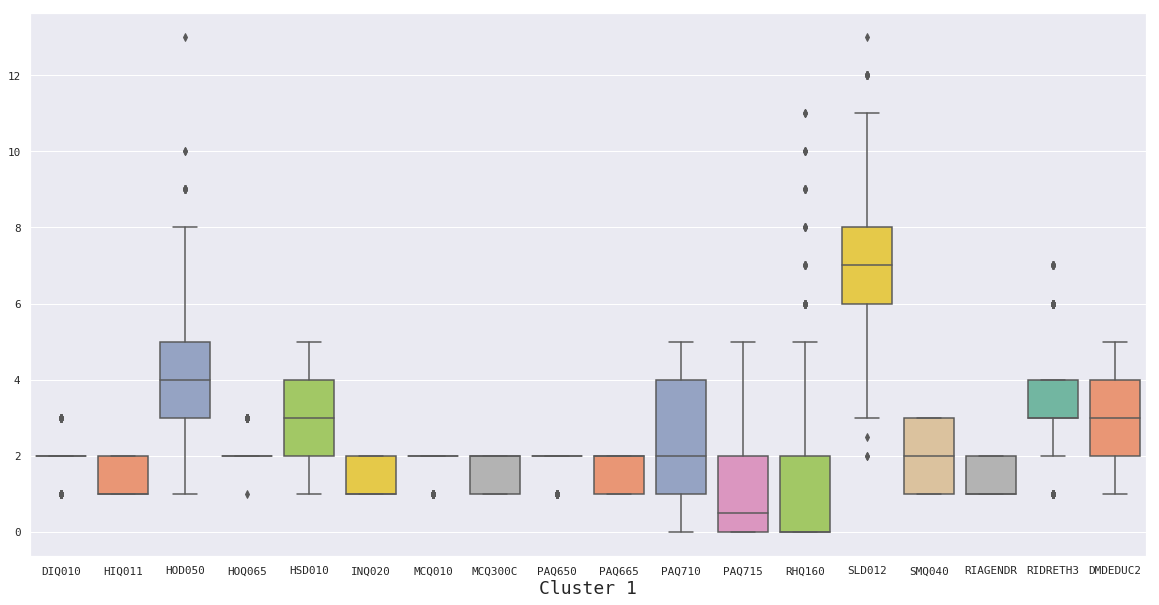

In [347]:
plt.figure(figsize=(20,10))
ax = sns.boxplot(data=cl1.loc[:, ('DIQ010', 'HIQ011', 'HOD050', 'HOQ065', 'HSD010',
           'INQ020', 'MCQ010', 'MCQ300C', 'PAQ650', 'PAQ665', 'PAQ710', 'PAQ715', 'RHQ160', 'SLD012', 'SMQ040',
           'RIAGENDR', 'RIDRETH3', 'DMDEDUC2')], 
                 orient="v", palette="Set2")
plt.xlabel("Cluster 1", fontsize=18)

Text(0.5, 0, 'Cluster 2')

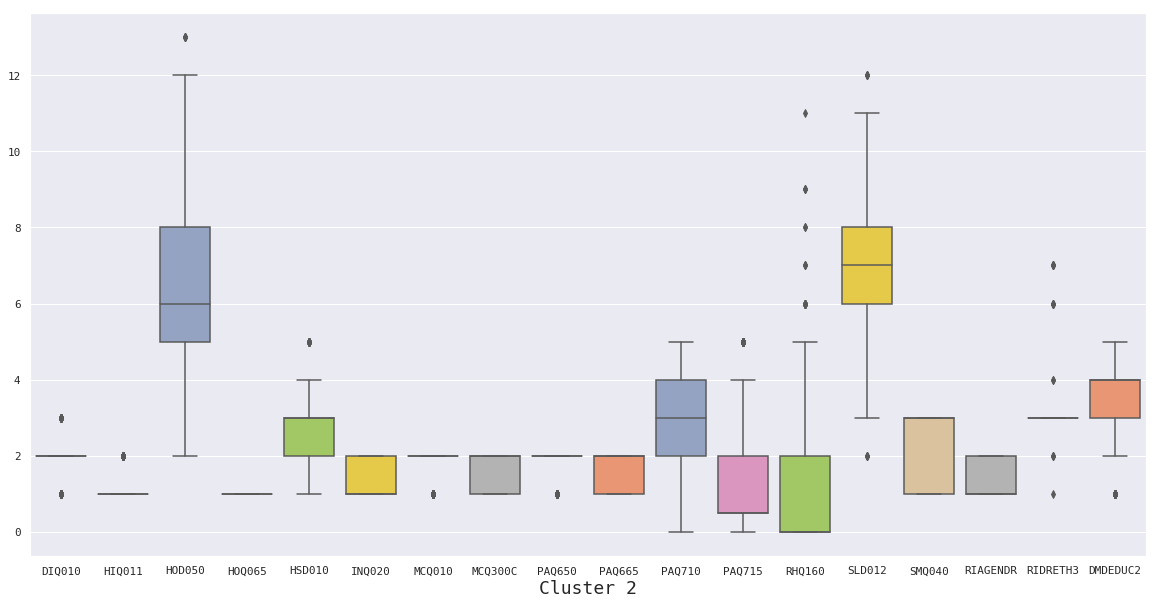

In [348]:
plt.figure(figsize=(20,10))
ax = sns.boxplot(data=cl2.loc[:, ('DIQ010', 'HIQ011', 'HOD050', 'HOQ065', 'HSD010',
           'INQ020', 'MCQ010', 'MCQ300C', 'PAQ650', 'PAQ665', 'PAQ710', 'PAQ715', 'RHQ160', 'SLD012', 'SMQ040',
           'RIAGENDR', 'RIDRETH3', 'DMDEDUC2')], 
                 orient="v", palette="Set2")
plt.xlabel("Cluster 2", fontsize=18)

Text(0.5, 0, 'Cluster 3')

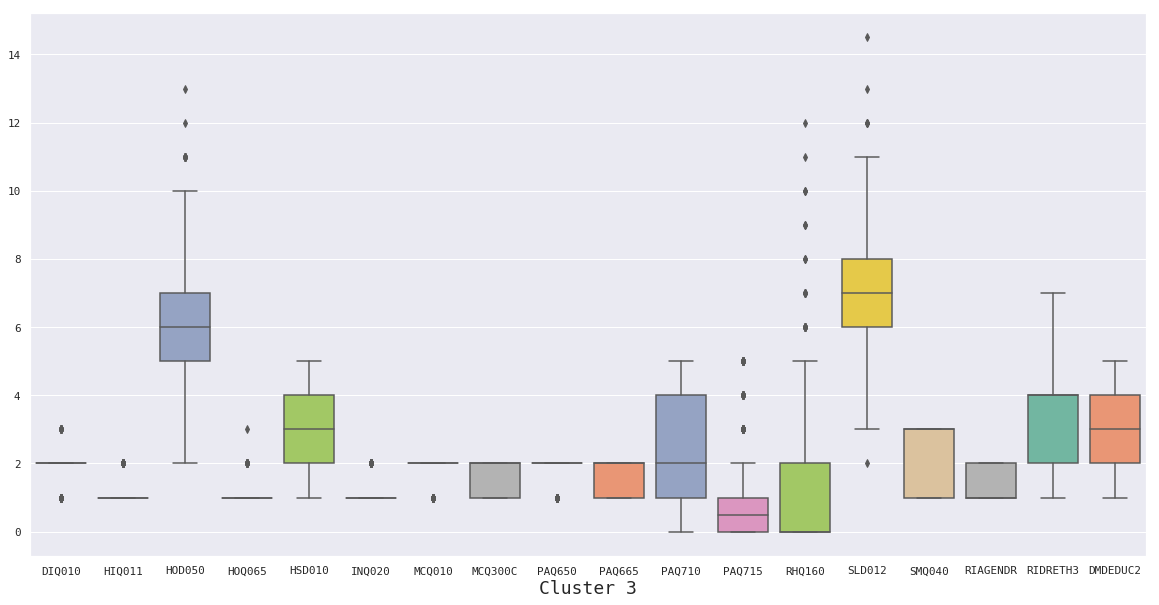

In [349]:
plt.figure(figsize=(20,10))
ax = sns.boxplot(data=cl3.loc[:, ('DIQ010', 'HIQ011', 'HOD050', 'HOQ065', 'HSD010',
           'INQ020', 'MCQ010', 'MCQ300C', 'PAQ650', 'PAQ665', 'PAQ710', 'PAQ715', 'RHQ160', 'SLD012', 'SMQ040',
           'RIAGENDR', 'RIDRETH3', 'DMDEDUC2')], 
                 orient="v", palette="Set2")
plt.xlabel("Cluster 3", fontsize=18)

In [350]:
cl3['HOQ065'].value_counts()


1.0    631
2.0     21
3.0      1
Name: HOQ065, dtype: int64

In [351]:
cl2['HOQ065'].value_counts()

1.0    751
Name: HOQ065, dtype: int64

In [352]:
cl1['HOQ065'].value_counts()

2.0    897
3.0     48
1.0      1
Name: HOQ065, dtype: int64

## Análisis PCA  

In [26]:
#Proyección PCA  2D HAC de dos clusters

pca = PCA(n_components=24)
principalComponents = pca.fit_transform(X)

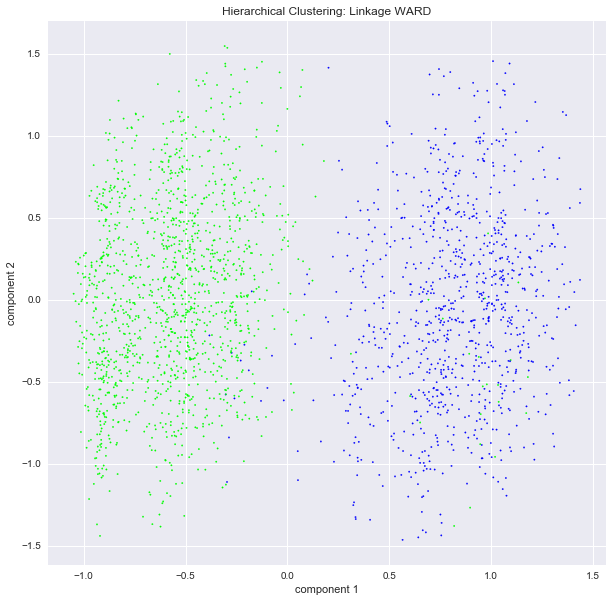

In [28]:
# Scatter proyección
plt.style.use('seaborn')
plt.figure(figsize=(10, 10))
plt.scatter(principalComponents[:,0], principalComponents[:,1], c=clusters, cmap=cm.brg, s=2)  # plot points with cluster dependent colors
plt.title('Hierarchical Clustering: Linkage WARD')
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.show()

In [29]:
# Varianza explicada 
pca.explained_variance_ratio_

array([0.15449265, 0.09571529, 0.0935799 , 0.07666424, 0.07129137,
       0.06267205, 0.05882476, 0.0451747 , 0.03938747, 0.03882761,
       0.03733706, 0.03188885, 0.02853565, 0.0263318 , 0.02456721,
       0.0200701 , 0.01679431, 0.01387804, 0.01123066, 0.01067149,
       0.00975786, 0.00849294, 0.00622987, 0.00548537])

In [30]:
principalComponents[:,0]

array([ 1.1262174 ,  0.38748108,  0.04417365, ..., -0.25603446,
       -0.5591002 ,  0.34497591])

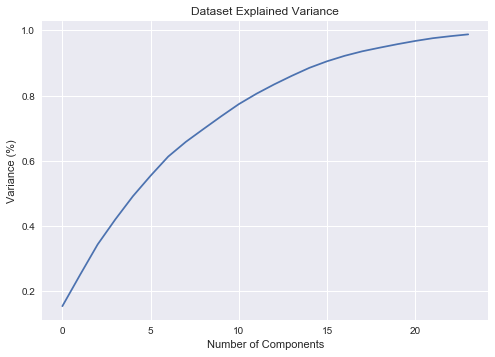

In [31]:
#Gráfico acumulativo de la varianza explicada de los componentes

plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') 
plt.title('Dataset Explained Variance')
plt.show()

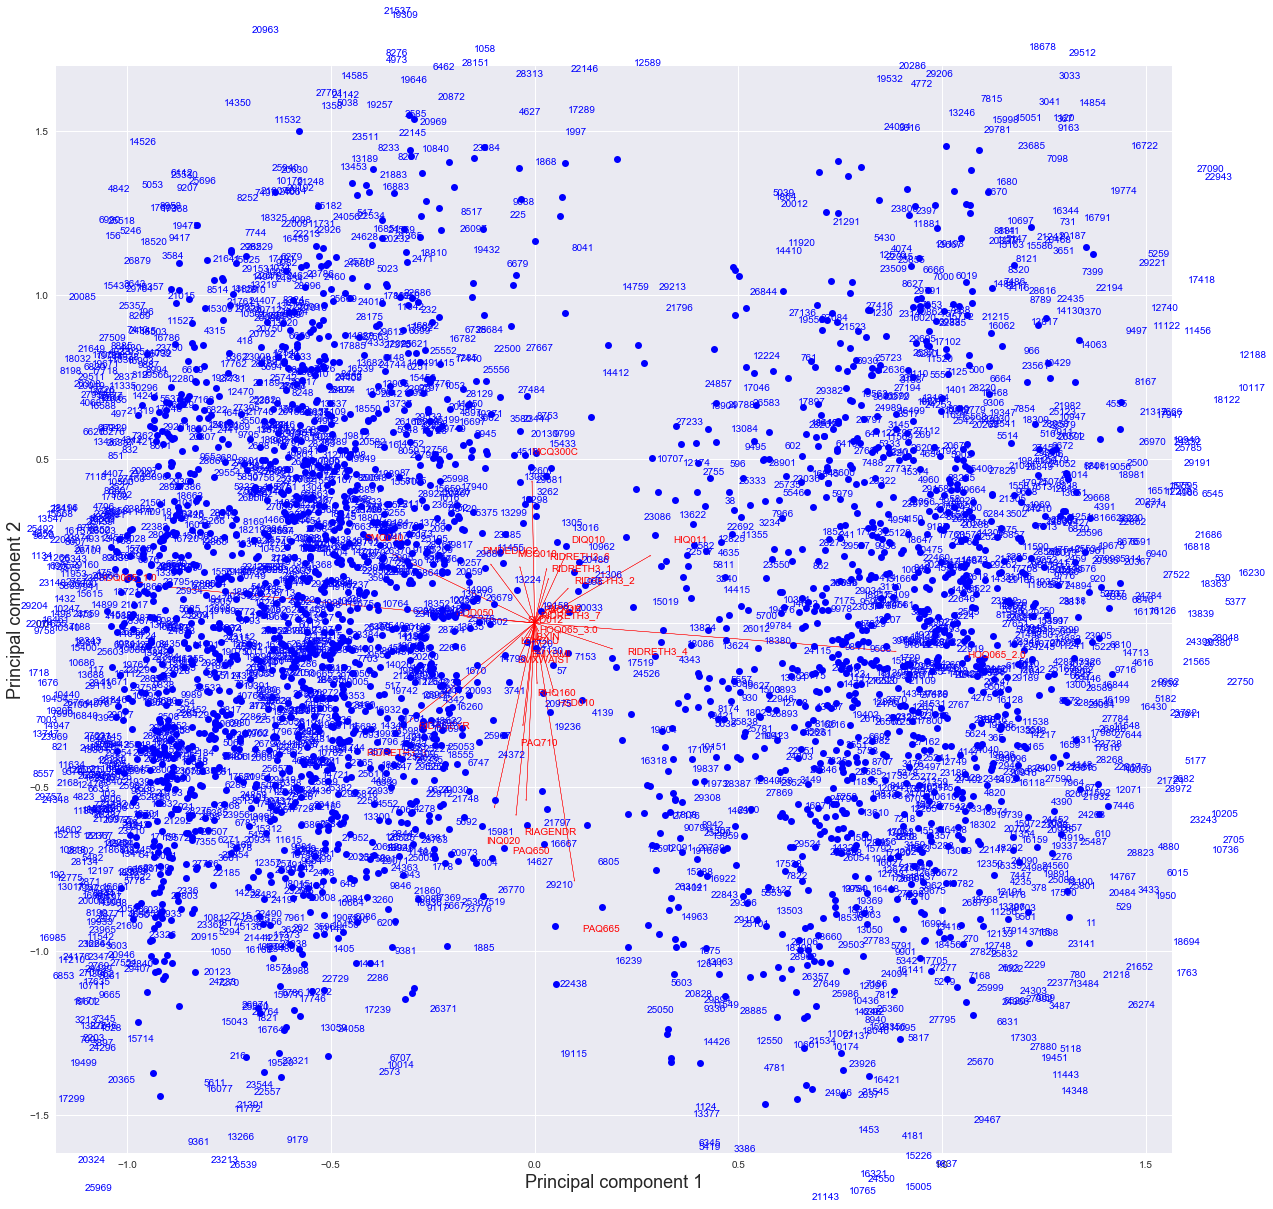

In [32]:
# Scatter + componentes principales

xvector = pca.components_[0] 
yvector = pca.components_[1]

xs = principalComponents[:,0] 
ys = principalComponents[:,1]


## visualize projections
    
plt.figure(figsize = (20,20))

for i in range(len(xvector)):
# arrows project features (ie columns from csv) as vectors onto PC axes
    plt.arrow(0, 0, xvector[i]*max(xs), yvector[i]*max(ys),
              color='r', width=0.0005, head_width=0.0025)
    plt.text(xvector[i]*max(xs)*1.2, yvector[i]*max(ys)*1.2,
             list(X.columns.values)[i], color='r')

for i in range(len(xs)):
# circles project documents (ie rows from csv) as points onto PC axes
    plt.plot(xs[i], ys[i], 'bo')
    plt.text(xs[i]*1.2, ys[i]*1.2, list(X.index)[i], color='b')
plt.xlabel("Principal component 1", fontsize=18)
plt.ylabel("Principal component 2", fontsize=18)
plt.show()

## Validación

In [33]:
# Índice para dos clústeres
davies_bouldin_score(X, clusters)

2.4525104982659833

In [38]:
# Índice para tres clústeres
davies_bouldin_score(X, clusters3)

2.7026552516684035